In [1]:
# C:\Users\luisg\OneDrive\Tec Milenio\Master en IA\002 Machine Learning\Tareas\Actividad-003\Actividad-03.ipynb

import sympy as sp

# Definir la variable simbólica
x = sp.Symbol('x')

# Función 1: f(x) = 3x + 4e^{-4x}
f1 = 3*x + 4*sp.exp(-4*x)
df1 = sp.diff(f1, x)

# Función 2: f(x) = 5x^(3x + 1) - 8x^2 - 3x
f2 = 5*x**(3*x + 1) - 8*x**2 - 3*x
df2 = sp.diff(f2, x)

# Mostrar resultados
print("Primera derivada de f1(x):", df1)
print("Primera derivada de f2(x):", df2)



Primera derivada de f1(x): 3 - 16*exp(-4*x)
Primera derivada de f2(x): -16*x + 5*x**(3*x + 1)*(3*log(x) + (3*x + 1)/x) - 3


<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in power
  return -8*x**2 - 3*x + 5*x**(3*x + 1)
<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in power
  return -16*x + 5*x**(3*x + 1)*(3*log(x) + (3*x + 1)/x) - 3
<lambdifygenerated-12>:2: RuntimeWarning: invalid value encountered in log
  return -16*x + 5*x**(3*x + 1)*(3*log(x) + (3*x + 1)/x) - 3


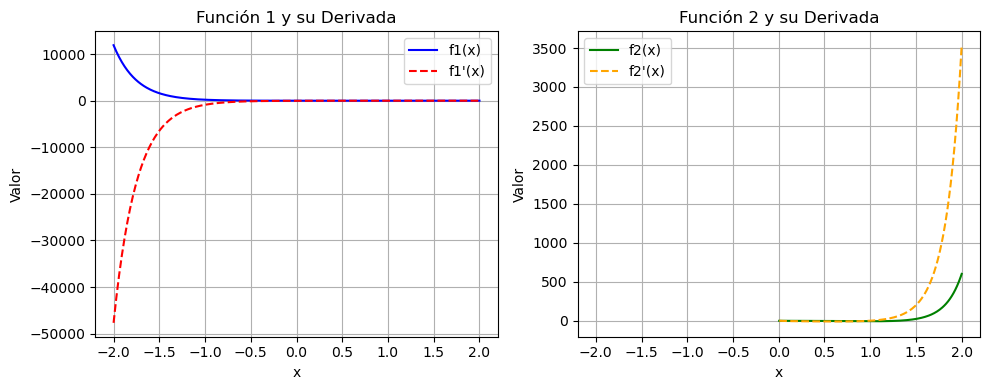

In [4]:
# Graficamos las funciones y sus derivadas:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Convertir a funciones numéricas para graficar
f1_num = sp.lambdify(x, f1, 'numpy')
df1_num = sp.lambdify(x, df1, 'numpy')

f2_num = sp.lambdify(x, f2, 'numpy')
df2_num = sp.lambdify(x, df2, 'numpy')

# Crear rango de valores
x_vals = np.linspace(-2, 2, 400)

# Graficar función 1 y su derivada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, f1_num(x_vals), label='f1(x)', color='blue')
plt.plot(x_vals, df1_num(x_vals), label="f1'(x)", color='red', linestyle='--')
plt.title('Función 1 y su Derivada')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Graficar función 2 y su derivada
plt.subplot(1, 2, 2)
plt.plot(x_vals, f2_num(x_vals), label='f2(x)', color='green')
plt.plot(x_vals, df2_num(x_vals), label="f2'(x)", color='orange', linestyle='--')
plt.title('Función 2 y su Derivada')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Calcular las segundas derivadas de ambas funciones:

import sympy as sp

# Definir la variable simbólica
x = sp.Symbol('x')

# Función A: f(x) = 4x⁴ + 6x² + e^(4x²)
fA = 4*x**4 + 6*x**2 + sp.exp(4*x**2)
segunda_derivada_A = sp.diff(fA, x, 2)

# Función B: f(x) = 1 / (2x³) + 8x
fB = 1 / (2*x**3) + 8*x
segunda_derivada_B = sp.diff(fB, x, 2)

# Mostrar resultados

print("Segunda derivada de fA(x): ", segunda_derivada_A)
# sp.pprint(segunda_derivada_A)

print("\nSegunda derivada de fB(x): ", segunda_derivada_B)
# sp.pprint(segunda_derivada_B)


Segunda derivada de fA(x):  4*(16*x**2*exp(4*x**2) + 12*x**2 + 2*exp(4*x**2) + 3)

Segunda derivada de fB(x):  6/x**5


In [ ]:
# Derivadas Parciales en Python


In [14]:
# Ejemplo en Python de algoritmo de propagación inversa donde se compruebe su funcionamiento.
import numpy as np

# Define la función de activación sigmoide, que transforma cualquier número en un valor entre 0 y 1. 
# Se usa para introducir no linealidad en la red.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define la derivada de la función sigmoide, necesaria para calcular los gradientes durante la propagación inversa.
def sigmoid_deriv(x):
    return x * (1 - x)

# Datos de entrada (2 neuronas, 4 muestras)
# Son las combinaciones posibles de dos bits
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Salidas esperadas (XOR)
# Este es el resultado del XOR lógico: solo es 1 cuando los bits son diferentes.
y = np.array([[0], [1], [1], [0]])

# Inicialización de pesos
np.random.seed(1)
# W1 conecta las 2 entradas con 4 neuronas ocultas.
W1 = np.random.rand(2, 4)  # pesos capa entrada → oculta
# W2 conecta las 4 neuronas ocultas con 1 salida.
W2 = np.random.rand(4, 1)  # pesos capa oculta → salida

# Entrenamiento, se repite 50,000 veces para que la red aprenda. 
for epoch in range(50000):
    # Propagación hacia adelante
    # Multiplica entradas por pesos (X · W1) y aplica la función sigmoide
    hidden_input = np.dot(X, W1)
    hidden_output = sigmoid(hidden_input)

    #Calcula la salida final de la red:
    # Multiplica salidas ocultas por pesos (hidden_output · W2)
    # Aplica sigmoide para obtener la predicción
    final_input = np.dot(hidden_output, W2)
    final_output = sigmoid(final_input)

    # Calcula el error entre la salida esperada "y" y la salida obtenida
    error = y - final_output

    # Propagación inversa
    # Calcula el gradiente de la salida usando la derivada de la sigmoide
    d_output = error * sigmoid_deriv(final_output)
    # Propaga el error hacia atrás a la capa oculta usando la regla de la cadena
    d_hidden = d_output.dot(W2.T) * sigmoid_deriv(hidden_output)

    # Actualiza los pesos usando los gradientes calculados. Esto es el corazón del aprendizaje.
    W2 += hidden_output.T.dot(d_output)
    W1 += X.T.dot(d_hidden)
    # Imprimimos la salida en la enésima época para ver su evolución.
    # Debería aproximarse a [0, 1, 1, 0].
    print("Salida final en la época:", epoch)
    print(final_output)
    
# Resultados finales
print("Resultados esperados:")
print(y)

print("Salida final después del entrenamiento:")
print(final_output)


Salida final en la época: 0
[[0.73497243]
 [0.75492189]
 [0.76945373]
 [0.78668195]]
Salida final en la época: 1
[[0.69155319]
 [0.70849376]
 [0.72111898]
 [0.73632909]]
Salida final en la época: 2
[[0.64827323]
 [0.66195116]
 [0.67197968]
 [0.68461396]]
Salida final en la época: 3
[[0.60954929]
 [0.62017801]
 [0.62744222]
 [0.63744005]]
Salida final en la época: 4
[[0.57817262]
 [0.58627572]
 [0.59108245]
 [0.59878423]]
Salida final en la época: 5
[[0.55455696]
 [0.56073685]
 [0.56360692]
 [0.56951319]]
Salida final en la época: 6
[[0.53758258]
 [0.542371  ]
 [0.54381975]
 [0.54840906]]
Salida final en la época: 7
[[0.52568812]
 [0.52949804]
 [0.5299427 ]
 [0.53359946]]
Salida final en la época: 8
[[0.51746131]
 [0.52059358]
 [0.52034251]
 [0.52335111]]
Salida final en la época: 9
[[0.51180764]
 [0.51447455]
 [0.51374609]
 [0.5163087 ]]
Salida final en la época: 10
[[0.50793412]
 [0.51028315]
 [0.50922885]
 [0.51148642]]
Salida final en la época: 11
[[0.50528384]
 [0.50741661]
 [0.506

Salida final en la época: 783
[[0.29692832]
 [0.65035153]
 [0.64559675]
 [0.42526109]]
Salida final en la época: 784
[[0.29614743]
 [0.65112941]
 [0.64653813]
 [0.4240178 ]]
Salida final en la época: 785
[[0.29536615]
 [0.65191671]
 [0.64748318]
 [0.42276261]]
Salida final en la época: 786
[[0.29458445]
 [0.65271353]
 [0.64843205]
 [0.42149543]]
Salida final en la época: 787
[[0.29380231]
 [0.65351994]
 [0.64938487]
 [0.42021613]]
Salida final en la época: 788
[[0.29301969]
 [0.65433603]
 [0.65034178]
 [0.41892464]]
Salida final en la época: 789
[[0.29223656]
 [0.65516187]
 [0.65130292]
 [0.41762085]]
Salida final en la época: 790
[[0.29145291]
 [0.65599753]
 [0.65226841]
 [0.41630471]]
Salida final en la época: 791
[[0.29066869]
 [0.65684307]
 [0.65323838]
 [0.41497613]]
Salida final en la época: 792
[[0.28988388]
 [0.65769855]
 [0.65421296]
 [0.41363507]]
Salida final en la época: 793
[[0.28909847]
 [0.65856401]
 [0.65519227]
 [0.41228147]]
Salida final en la época: 794
[[0.28831243]

Salida final en la época: 1410
[[0.09516396]
 [0.92041729]
 [0.91841066]
 [0.07181739]]
Salida final en la época: 1411
[[0.09508326]
 [0.92049084]
 [0.91848864]
 [0.07174185]]
Salida final en la época: 1412
[[0.09500275]
 [0.9205642 ]
 [0.91856641]
 [0.07166654]]
Salida final en la época: 1413
[[0.09492241]
 [0.92063735]
 [0.91864398]
 [0.07159145]]
Salida final en la época: 1414
[[0.09484226]
 [0.92071031]
 [0.91872134]
 [0.07151659]]
Salida final en la época: 1415
[[0.09476229]
 [0.92078308]
 [0.9187985 ]
 [0.07144196]]
Salida final en la época: 1416
[[0.0946825 ]
 [0.92085565]
 [0.91887546]
 [0.07136754]]
Salida final en la época: 1417
[[0.09460289]
 [0.92092802]
 [0.91895221]
 [0.07129334]]
Salida final en la época: 1418
[[0.09452346]
 [0.92100021]
 [0.91902877]
 [0.07121937]]
Salida final en la época: 1419
[[0.09444421]
 [0.9210722 ]
 [0.91910512]
 [0.07114561]]
Salida final en la época: 1420
[[0.09436514]
 [0.92114399]
 [0.91918128]
 [0.07107207]]
Salida final en la época: 1421
[

Salida final en la época: 2120
[[0.06252561]
 [0.94789431]
 [0.94783448]
 [0.04537916]]
Salida final en la época: 2121
[[0.0624985 ]
 [0.94791547]
 [0.94785734]
 [0.04536033]]
Salida final en la época: 2122
[[0.06247143]
 [0.9479366 ]
 [0.94788017]
 [0.04534153]]
Salida final en la época: 2123
[[0.06244438]
 [0.94795771]
 [0.94790297]
 [0.04532276]]
Salida final en la época: 2124
[[0.06241737]
 [0.94797879]
 [0.94792575]
 [0.04530401]]
Salida final en la época: 2125
[[0.06239038]
 [0.94799985]
 [0.9479485 ]
 [0.04528529]]
Salida final en la época: 2126
[[0.06236342]
 [0.94802088]
 [0.94797122]
 [0.04526659]]
Salida final en la época: 2127
[[0.0623365 ]
 [0.94804189]
 [0.94799392]
 [0.04524791]]
Salida final en la época: 2128
[[0.0623096 ]
 [0.94806288]
 [0.94801659]
 [0.04522926]]
Salida final en la época: 2129
[[0.06228273]
 [0.94808383]
 [0.94803923]
 [0.04521064]]
Salida final en la época: 2130
[[0.06225588]
 [0.94810477]
 [0.94806185]
 [0.04519204]]
Salida final en la época: 2131
[

Salida final en la época: 2802
[[0.04888315]
 [0.95827899]
 [0.95906105]
 [0.03645349]]
Salida final en la época: 2803
[[0.04886824]
 [0.95829009]
 [0.95907303]
 [0.03644428]]
Salida final en la época: 2804
[[0.04885334]
 [0.95830118]
 [0.95908501]
 [0.03643508]]
Salida final en la época: 2805
[[0.04883845]
 [0.95831226]
 [0.95909697]
 [0.0364259 ]]
Salida final en la época: 2806
[[0.04882357]
 [0.95832333]
 [0.95910893]
 [0.03641671]]
Salida final en la época: 2807
[[0.0488087 ]
 [0.9583344 ]
 [0.95912087]
 [0.03640754]]
Salida final en la época: 2808
[[0.04879384]
 [0.95834545]
 [0.95913281]
 [0.03639837]]
Salida final en la época: 2809
[[0.04877899]
 [0.9583565 ]
 [0.95914474]
 [0.03638921]]
Salida final en la época: 2810
[[0.04876415]
 [0.95836754]
 [0.95915666]
 [0.03638006]]
Salida final en la época: 2811
[[0.04874932]
 [0.95837857]
 [0.95916857]
 [0.03637092]]
Salida final en la época: 2812
[[0.04873451]
 [0.95838959]
 [0.95918047]
 [0.03636178]]
Salida final en la época: 2813
[

Salida final en la época: 3340
[[0.04213625]
 [0.9632593 ]
 [0.96442504]
 [0.03238919]]
Salida final en la época: 3341
[[0.04212568]
 [0.96326705]
 [0.96443336]
 [0.03238296]]
Salida final en la época: 3342
[[0.04211511]
 [0.9632748 ]
 [0.96444168]
 [0.03237674]]
Salida final en la época: 3343
[[0.04210454]
 [0.96328255]
 [0.96444999]
 [0.03237051]]
Salida final en la época: 3344
[[0.04209399]
 [0.96329029]
 [0.9644583 ]
 [0.03236429]]
Salida final en la época: 3345
[[0.04208344]
 [0.96329803]
 [0.9644666 ]
 [0.03235808]]
Salida final en la época: 3346
[[0.04207289]
 [0.96330576]
 [0.9644749 ]
 [0.03235187]]
Salida final en la época: 3347
[[0.04206235]
 [0.96331349]
 [0.96448319]
 [0.03234566]]
Salida final en la época: 3348
[[0.04205182]
 [0.96332121]
 [0.96449148]
 [0.03233946]]
Salida final en la época: 3349
[[0.04204129]
 [0.96332893]
 [0.96449976]
 [0.03233326]]
Salida final en la época: 3350
[[0.04203077]
 [0.96333664]
 [0.96450804]
 [0.03232706]]
Salida final en la época: 3351
[

Salida final en la época: 3955
[[0.03658723]
 [0.96731816]
 [0.96876104]
 [0.02916129]]
Salida final en la época: 3956
[[0.03657951]
 [0.9673238 ]
 [0.96876703]
 [0.02915684]]
Salida final en la época: 3957
[[0.0365718 ]
 [0.96732944]
 [0.96877301]
 [0.0291524 ]]
Salida final en la época: 3958
[[0.0365641 ]
 [0.96733507]
 [0.968779  ]
 [0.02914796]]
Salida final en la época: 3959
[[0.03655639]
 [0.9673407 ]
 [0.96878498]
 [0.02914352]]
Salida final en la época: 3960
[[0.03654869]
 [0.96734633]
 [0.96879096]
 [0.02913908]]
Salida final en la época: 3961
[[0.036541  ]
 [0.96735196]
 [0.96879693]
 [0.02913464]]
Salida final en la época: 3962
[[0.0365333 ]
 [0.96735758]
 [0.96880291]
 [0.02913021]]
Salida final en la época: 3963
[[0.03652562]
 [0.9673632 ]
 [0.96880888]
 [0.02912577]]
Salida final en la época: 3964
[[0.03651793]
 [0.96736882]
 [0.96881485]
 [0.02912134]]
Salida final en la época: 3965
[[0.03651025]
 [0.96737444]
 [0.96882081]
 [0.02911692]]
Salida final en la época: 3966
[

Salida final en la época: 4632
[[0.03206533]
 [0.97063459]
 [0.9722618 ]
 [0.02655299]]
Salida final en la época: 4633
[[0.03205954]
 [0.97063886]
 [0.97226627]
 [0.02654963]]
Salida final en la época: 4634
[[0.03205376]
 [0.97064313]
 [0.97227074]
 [0.02654627]]
Salida final en la época: 4635
[[0.03204797]
 [0.9706474 ]
 [0.97227522]
 [0.02654291]]
Salida final en la época: 4636
[[0.03204219]
 [0.97065166]
 [0.97227969]
 [0.02653956]]
Salida final en la época: 4637
[[0.03203641]
 [0.97065593]
 [0.97228415]
 [0.02653621]]
Salida final en la época: 4638
[[0.03203063]
 [0.97066019]
 [0.97228862]
 [0.02653285]]
Salida final en la época: 4639
[[0.03202485]
 [0.97066445]
 [0.97229308]
 [0.0265295 ]]
Salida final en la época: 4640
[[0.03201908]
 [0.97066871]
 [0.97229755]
 [0.02652615]]
Salida final en la época: 4641
[[0.03201331]
 [0.97067297]
 [0.97230201]
 [0.0265228 ]]
Salida final en la época: 4642
[[0.03200754]
 [0.97067722]
 [0.97230647]
 [0.02651945]]
Salida final en la época: 4643
[

Salida final en la época: 5315
[[0.02857236]
 [0.97323291]
 [0.97496467]
 [0.02449848]]
Salida final en la época: 5316
[[0.02856785]
 [0.97323631]
 [0.97496817]
 [0.02449577]]
Salida final en la época: 5317
[[0.02856333]
 [0.9732397 ]
 [0.97497167]
 [0.02449306]]
Salida final en la época: 5318
[[0.02855882]
 [0.9732431 ]
 [0.97497518]
 [0.02449036]]
Salida final en la época: 5319
[[0.0285543 ]
 [0.97324649]
 [0.97497868]
 [0.02448765]]
Salida final en la época: 5320
[[0.02854979]
 [0.97324989]
 [0.97498218]
 [0.02448494]]
Salida final en la época: 5321
[[0.02854528]
 [0.97325328]
 [0.97498568]
 [0.02448224]]
Salida final en la época: 5322
[[0.02854077]
 [0.97325667]
 [0.97498918]
 [0.02447954]]
Salida final en la época: 5323
[[0.02853627]
 [0.97326006]
 [0.97499267]
 [0.02447683]]
Salida final en la época: 5324
[[0.02853176]
 [0.97326345]
 [0.97499617]
 [0.02447413]]
Salida final en la época: 5325
[[0.02852726]
 [0.97326684]
 [0.97499966]
 [0.02447143]]
Salida final en la época: 5326
[

Salida final en la época: 5970
[[0.02591048]
 [0.97525938]
 [0.97703918]
 [0.02286583]]
Salida final en la época: 5971
[[0.02590683]
 [0.9752622 ]
 [0.97704204]
 [0.02286352]]
Salida final en la época: 5972
[[0.02590317]
 [0.97526502]
 [0.9770449 ]
 [0.02286122]]
Salida final en la época: 5973
[[0.02589952]
 [0.97526784]
 [0.97704777]
 [0.02285892]]
Salida final en la época: 5974
[[0.02589587]
 [0.97527066]
 [0.97705063]
 [0.02285662]]
Salida final en la época: 5975
[[0.02589222]
 [0.97527348]
 [0.97705349]
 [0.02285432]]
Salida final en la época: 5976
[[0.02588858]
 [0.9752763 ]
 [0.97705635]
 [0.02285202]]
Salida final en la época: 5977
[[0.02588493]
 [0.97527912]
 [0.9770592 ]
 [0.02284972]]
Salida final en la época: 5978
[[0.02588128]
 [0.97528193]
 [0.97706206]
 [0.02284742]]
Salida final en la época: 5979
[[0.02587764]
 [0.97528475]
 [0.97706492]
 [0.02284513]]
Salida final en la época: 5980
[[0.025874  ]
 [0.97528756]
 [0.97706777]
 [0.02284283]]
Salida final en la época: 5981
[

Salida final en la época: 6843
[[0.02310282]
 [0.97747132]
 [0.97925922]
 [0.02102771]]
Salida final en la época: 6844
[[0.0231    ]
 [0.9774736 ]
 [0.97926148]
 [0.02102577]]
Salida final en la época: 6845
[[0.02309717]
 [0.97747588]
 [0.97926374]
 [0.02102384]]
Salida final en la época: 6846
[[0.02309435]
 [0.97747816]
 [0.979266  ]
 [0.02102191]]
Salida final en la época: 6847
[[0.02309152]
 [0.97748043]
 [0.97926825]
 [0.02101998]]
Salida final en la época: 6848
[[0.0230887 ]
 [0.97748271]
 [0.97927051]
 [0.02101805]]
Salida final en la época: 6849
[[0.02308588]
 [0.97748498]
 [0.97927276]
 [0.02101612]]
Salida final en la época: 6850
[[0.02308305]
 [0.97748726]
 [0.97927502]
 [0.02101419]]
Salida final en la época: 6851
[[0.02308023]
 [0.97748953]
 [0.97927727]
 [0.02101226]]
Salida final en la época: 6852
[[0.02307741]
 [0.97749181]
 [0.97927953]
 [0.02101034]]
Salida final en la época: 6853
[[0.02307459]
 [0.97749408]
 [0.97928178]
 [0.02100841]]
Salida final en la época: 6854
[

Salida final en la época: 7710
[[0.02092038]
 [0.9792689 ]
 [0.98102034]
 [0.01947558]]
Salida final en la época: 7711
[[0.02091814]
 [0.97927079]
 [0.98102217]
 [0.01947392]]
Salida final en la época: 7712
[[0.0209159 ]
 [0.97927268]
 [0.98102399]
 [0.01947227]]
Salida final en la época: 7713
[[0.02091366]
 [0.97927456]
 [0.98102582]
 [0.01947061]]
Salida final en la época: 7714
[[0.02091143]
 [0.97927645]
 [0.98102764]
 [0.01946895]]
Salida final en la época: 7715
[[0.02090919]
 [0.97927834]
 [0.98102946]
 [0.01946729]]
Salida final en la época: 7716
[[0.02090696]
 [0.97928022]
 [0.98103129]
 [0.01946563]]
Salida final en la época: 7717
[[0.02090472]
 [0.9792821 ]
 [0.98103311]
 [0.01946397]]
Salida final en la época: 7718
[[0.02090249]
 [0.97928399]
 [0.98103493]
 [0.01946232]]
Salida final en la época: 7719
[[0.02090026]
 [0.97928587]
 [0.98103675]
 [0.01946066]]
Salida final en la época: 7720
[[0.02089802]
 [0.97928776]
 [0.98103858]
 [0.019459  ]]
Salida final en la época: 7721
[

Salida final en la época: 8393
[[0.01951665]
 [0.98047222]
 [0.9821737 ]
 [0.01840447]]
Salida final en la época: 8394
[[0.01951476]
 [0.98047387]
 [0.98217526]
 [0.01840299]]
Salida final en la época: 8395
[[0.01951288]
 [0.98047551]
 [0.98217682]
 [0.01840151]]
Salida final en la época: 8396
[[0.01951099]
 [0.98047715]
 [0.98217838]
 [0.01840003]]
Salida final en la época: 8397
[[0.01950911]
 [0.9804788 ]
 [0.98217994]
 [0.01839855]]
Salida final en la época: 8398
[[0.01950722]
 [0.98048044]
 [0.9821815 ]
 [0.01839707]]
Salida final en la época: 8399
[[0.01950534]
 [0.98048208]
 [0.98218306]
 [0.01839559]]
Salida final en la época: 8400
[[0.01950346]
 [0.98048372]
 [0.98218461]
 [0.01839411]]
Salida final en la época: 8401
[[0.01950157]
 [0.98048537]
 [0.98218617]
 [0.01839263]]
Salida final en la época: 8402
[[0.01949969]
 [0.98048701]
 [0.98218773]
 [0.01839115]]
Salida final en la época: 8403
[[0.01949781]
 [0.98048865]
 [0.98218929]
 [0.01838968]]
Salida final en la época: 8404
[

Salida final en la época: 9060
[[0.01835381]
 [0.98150133]
 [0.98314221]
 [0.01746914]]
Salida final en la época: 9061
[[0.0183522 ]
 [0.98150277]
 [0.98314356]
 [0.01746781]]
Salida final en la época: 9062
[[0.01835059]
 [0.98150422]
 [0.98314491]
 [0.01746649]]
Salida final en la época: 9063
[[0.01834898]
 [0.98150567]
 [0.98314626]
 [0.01746516]]
Salida final en la época: 9064
[[0.01834737]
 [0.98150711]
 [0.98314761]
 [0.01746383]]
Salida final en la época: 9065
[[0.01834576]
 [0.98150856]
 [0.98314895]
 [0.01746251]]
Salida final en la época: 9066
[[0.01834415]
 [0.98151   ]
 [0.9831503 ]
 [0.01746118]]
Salida final en la época: 9067
[[0.01834254]
 [0.98151145]
 [0.98315165]
 [0.01745986]]
Salida final en la época: 9068
[[0.01834093]
 [0.98151289]
 [0.983153  ]
 [0.01745853]]
Salida final en la época: 9069
[[0.01833932]
 [0.98151434]
 [0.98315435]
 [0.01745721]]
Salida final en la época: 9070
[[0.01833772]
 [0.98151578]
 [0.98315569]
 [0.01745588]]
Salida final en la época: 9071
[

Salida final en la época: 9821
[[0.01722653]
 [0.98252877]
 [0.98409204]
 [0.01652011]]
Salida final en la época: 9822
[[0.01722517]
 [0.98253003]
 [0.9840932 ]
 [0.01651894]]
Salida final en la época: 9823
[[0.01722381]
 [0.98253129]
 [0.98409435]
 [0.01651777]]
Salida final en la época: 9824
[[0.01722245]
 [0.98253255]
 [0.9840955 ]
 [0.0165166 ]]
Salida final en la época: 9825
[[0.01722109]
 [0.98253381]
 [0.98409666]
 [0.01651543]]
Salida final en la época: 9826
[[0.01721973]
 [0.98253507]
 [0.98409781]
 [0.01651426]]
Salida final en la época: 9827
[[0.01721837]
 [0.98253632]
 [0.98409896]
 [0.01651309]]
Salida final en la época: 9828
[[0.01721701]
 [0.98253758]
 [0.98410011]
 [0.01651192]]
Salida final en la época: 9829
[[0.01721565]
 [0.98253884]
 [0.98410126]
 [0.01651075]]
Salida final en la época: 9830
[[0.01721429]
 [0.9825401 ]
 [0.98410242]
 [0.01650958]]
Salida final en la época: 9831
[[0.01721293]
 [0.98254135]
 [0.98410357]
 [0.01650842]]
Salida final en la época: 9832
[

Salida final en la época: 10489
[[0.01637754]
 [0.9833222 ]
 [0.98481379]
 [0.01577908]]
Salida final en la época: 10490
[[0.01637636]
 [0.98332332]
 [0.9848148 ]
 [0.01577803]]
Salida final en la época: 10491
[[0.01637517]
 [0.98332444]
 [0.98481581]
 [0.01577698]]
Salida final en la época: 10492
[[0.01637399]
 [0.98332556]
 [0.98481682]
 [0.01577593]]
Salida final en la época: 10493
[[0.0163728 ]
 [0.98332668]
 [0.98481784]
 [0.01577488]]
Salida final en la época: 10494
[[0.01637162]
 [0.98332779]
 [0.98481885]
 [0.01577383]]
Salida final en la época: 10495
[[0.01637043]
 [0.98332891]
 [0.98481986]
 [0.01577279]]
Salida final en la época: 10496
[[0.01636925]
 [0.98333003]
 [0.98482087]
 [0.01577174]]
Salida final en la época: 10497
[[0.01636806]
 [0.98333115]
 [0.98482188]
 [0.01577069]]
Salida final en la época: 10498
[[0.01636688]
 [0.98333227]
 [0.98482289]
 [0.01576964]]
Salida final en la época: 10499
[[0.01636569]
 [0.98333339]
 [0.9848239 ]
 [0.01576859]]
Salida final en la ép

Salida final en la época: 11079
[[0.01571665]
 [0.98395115]
 [0.98537884]
 [0.01518801]]
Salida final en la época: 11080
[[0.01571559]
 [0.98395216]
 [0.98537975]
 [0.01518705]]
Salida final en la época: 11081
[[0.01571454]
 [0.98395318]
 [0.98538066]
 [0.0151861 ]]
Salida final en la época: 11082
[[0.01571348]
 [0.98395419]
 [0.98538156]
 [0.01518514]]
Salida final en la época: 11083
[[0.01571242]
 [0.98395521]
 [0.98538247]
 [0.01518419]]
Salida final en la época: 11084
[[0.01571136]
 [0.98395622]
 [0.98538337]
 [0.01518323]]
Salida final en la época: 11085
[[0.01571031]
 [0.98395723]
 [0.98538428]
 [0.01518228]]
Salida final en la época: 11086
[[0.01570925]
 [0.98395825]
 [0.98538518]
 [0.01518132]]
Salida final en la época: 11087
[[0.01570819]
 [0.98395926]
 [0.98538609]
 [0.01518037]]
Salida final en la época: 11088
[[0.01570714]
 [0.98396027]
 [0.98538699]
 [0.01517941]]
Salida final en la época: 11089
[[0.01570608]
 [0.98396128]
 [0.9853879 ]
 [0.01517846]]
Salida final en la ép

Salida final en la época: 12121
[[0.01471293]
 [0.9849239 ]
 [0.98624117]
 [0.01427004]]
Salida final en la época: 12122
[[0.01471205]
 [0.98492476]
 [0.98624193]
 [0.01426922]]
Salida final en la época: 12123
[[0.01471117]
 [0.98492562]
 [0.98624269]
 [0.01426841]]
Salida final en la época: 12124
[[0.0147103 ]
 [0.98492648]
 [0.98624344]
 [0.0142676 ]]
Salida final en la época: 12125
[[0.01470942]
 [0.98492734]
 [0.9862442 ]
 [0.01426679]]
Salida final en la época: 12126
[[0.01470854]
 [0.98492819]
 [0.98624495]
 [0.01426598]]
Salida final en la época: 12127
[[0.01470767]
 [0.98492905]
 [0.98624571]
 [0.01426517]]
Salida final en la época: 12128
[[0.01470679]
 [0.98492991]
 [0.98624646]
 [0.01426436]]
Salida final en la época: 12129
[[0.01470591]
 [0.98493077]
 [0.98624721]
 [0.01426355]]
Salida final en la época: 12130
[[0.01470504]
 [0.98493163]
 [0.98624797]
 [0.01426274]]
Salida final en la época: 12131
[[0.01470416]
 [0.98493248]
 [0.98624872]
 [0.01426193]]
Salida final en la ép

Salida final en la época: 13039
[[0.01396579]
 [0.98566004]
 [0.98688529]
 [0.0135743 ]]
Salida final en la época: 13040
[[0.01396503]
 [0.98566079]
 [0.98688595]
 [0.01357359]]
Salida final en la época: 13041
[[0.01396428]
 [0.98566154]
 [0.9868866 ]
 [0.01357288]]
Salida final en la época: 13042
[[0.01396352]
 [0.98566229]
 [0.98688725]
 [0.01357218]]
Salida final en la época: 13043
[[0.01396277]
 [0.98566304]
 [0.9868879 ]
 [0.01357147]]
Salida final en la época: 13044
[[0.01396201]
 [0.98566378]
 [0.98688855]
 [0.01357076]]
Salida final en la época: 13045
[[0.01396126]
 [0.98566453]
 [0.9868892 ]
 [0.01357006]]
Salida final en la época: 13046
[[0.0139605 ]
 [0.98566528]
 [0.98688985]
 [0.01356935]]
Salida final en la época: 13047
[[0.01395975]
 [0.98566603]
 [0.9868905 ]
 [0.01356864]]
Salida final en la época: 13048
[[0.013959  ]
 [0.98566677]
 [0.98689116]
 [0.01356794]]
Salida final en la época: 13049
[[0.01395824]
 [0.98566752]
 [0.98689181]
 [0.01356723]]
Salida final en la ép

Salida final en la época: 14000
[[0.01329059]
 [0.9863325 ]
 [0.98746827]
 [0.0129394 ]]
Salida final en la época: 14001
[[0.01328994]
 [0.98633315]
 [0.98746883]
 [0.01293879]]
Salida final en la época: 14002
[[0.01328928]
 [0.9863338 ]
 [0.9874694 ]
 [0.01293817]]
Salida final en la época: 14003
[[0.01328863]
 [0.98633446]
 [0.98746996]
 [0.01293755]]
Salida final en la época: 14004
[[0.01328797]
 [0.98633511]
 [0.98747052]
 [0.01293694]]
Salida final en la época: 14005
[[0.01328732]
 [0.98633576]
 [0.98747109]
 [0.01293632]]
Salida final en la época: 14006
[[0.01328667]
 [0.98633642]
 [0.98747165]
 [0.0129357 ]]
Salida final en la época: 14007
[[0.01328601]
 [0.98633707]
 [0.98747222]
 [0.01293509]]
Salida final en la época: 14008
[[0.01328536]
 [0.98633772]
 [0.98747278]
 [0.01293447]]
Salida final en la época: 14009
[[0.01328471]
 [0.98633838]
 [0.98747335]
 [0.01293385]]
Salida final en la época: 14010
[[0.01328406]
 [0.98633903]
 [0.98747391]
 [0.01293324]]
Salida final en la ép

Salida final en la época: 14944
[[0.01271226]
 [0.98691267]
 [0.98796784]
 [0.01239294]]
Salida final en la época: 14945
[[0.01271168]
 [0.98691324]
 [0.98796834]
 [0.0123924 ]]
Salida final en la época: 14946
[[0.01271111]
 [0.98691382]
 [0.98796883]
 [0.01239185]]
Salida final en la época: 14947
[[0.01271053]
 [0.9869144 ]
 [0.98796933]
 [0.01239131]]
Salida final en la época: 14948
[[0.01270996]
 [0.98691498]
 [0.98796982]
 [0.01239077]]
Salida final en la época: 14949
[[0.01270939]
 [0.98691555]
 [0.98797032]
 [0.01239023]]
Salida final en la época: 14950
[[0.01270881]
 [0.98691613]
 [0.98797081]
 [0.01238968]]
Salida final en la época: 14951
[[0.01270824]
 [0.98691671]
 [0.98797131]
 [0.01238914]]
Salida final en la época: 14952
[[0.01270767]
 [0.98691728]
 [0.98797181]
 [0.0123886 ]]
Salida final en la época: 14953
[[0.01270709]
 [0.98691786]
 [0.9879723 ]
 [0.01238806]]
Salida final en la época: 14954
[[0.01270652]
 [0.98691844]
 [0.9879728 ]
 [0.01238751]]
Salida final en la ép

Salida final en la época: 15808
[[0.01224286]
 [0.98738559]
 [0.98837327]
 [0.01194879]]
Salida final en la época: 15809
[[0.01224235]
 [0.98738611]
 [0.98837372]
 [0.01194831]]
Salida final en la época: 15810
[[0.01224184]
 [0.98738663]
 [0.98837416]
 [0.01194782]]
Salida final en la época: 15811
[[0.01224132]
 [0.98738715]
 [0.9883746 ]
 [0.01194733]]
Salida final en la época: 15812
[[0.01224081]
 [0.98738767]
 [0.98837505]
 [0.01194685]]
Salida final en la época: 15813
[[0.01224029]
 [0.98738819]
 [0.98837549]
 [0.01194636]]
Salida final en la época: 15814
[[0.01223978]
 [0.9873887 ]
 [0.98837593]
 [0.01194587]]
Salida final en la época: 15815
[[0.01223927]
 [0.98738922]
 [0.98837638]
 [0.01194539]]
Salida final en la época: 15816
[[0.01223875]
 [0.98738974]
 [0.98837682]
 [0.0119449 ]]
Salida final en la época: 15817
[[0.01223824]
 [0.98739026]
 [0.98837727]
 [0.01194442]]
Salida final en la época: 15818
[[0.01223773]
 [0.98739078]
 [0.98837771]
 [0.01194393]]
Salida final en la ép

Salida final en la época: 16646
[[0.01183304]
 [0.98779948]
 [0.98872714]
 [0.01156125]]
Salida final en la época: 16647
[[0.01183258]
 [0.98779995]
 [0.98872754]
 [0.01156081]]
Salida final en la época: 16648
[[0.01183211]
 [0.98780042]
 [0.98872794]
 [0.01156037]]
Salida final en la época: 16649
[[0.01183165]
 [0.98780089]
 [0.98872834]
 [0.01155993]]
Salida final en la época: 16650
[[0.01183118]
 [0.98780136]
 [0.98872874]
 [0.01155949]]
Salida final en la época: 16651
[[0.01183072]
 [0.98780183]
 [0.98872915]
 [0.01155905]]
Salida final en la época: 16652
[[0.01183025]
 [0.9878023 ]
 [0.98872955]
 [0.01155861]]
Salida final en la época: 16653
[[0.01182979]
 [0.98780277]
 [0.98872995]
 [0.01155818]]
Salida final en la época: 16654
[[0.01182932]
 [0.98780324]
 [0.98873035]
 [0.01155774]]
Salida final en la época: 16655
[[0.01182886]
 [0.98780371]
 [0.98873075]
 [0.0115573 ]]
Salida final en la época: 16656
[[0.01182839]
 [0.98780418]
 [0.98873115]
 [0.01155686]]
Salida final en la ép

Salida final en la época: 17539
[[0.01143786]
 [0.98819904]
 [0.98906823]
 [0.01118827]]
Salida final en la época: 17540
[[0.01143744]
 [0.98819947]
 [0.9890686 ]
 [0.01118787]]
Salida final en la época: 17541
[[0.01143702]
 [0.98819989]
 [0.98906896]
 [0.01118748]]
Salida final en la época: 17542
[[0.0114366 ]
 [0.98820032]
 [0.98906932]
 [0.01118708]]
Salida final en la época: 17543
[[0.01143618]
 [0.98820074]
 [0.98906969]
 [0.01118668]]
Salida final en la época: 17544
[[0.01143576]
 [0.98820117]
 [0.98907005]
 [0.01118629]]
Salida final en la época: 17545
[[0.01143534]
 [0.9882016 ]
 [0.98907041]
 [0.01118589]]
Salida final en la época: 17546
[[0.01143492]
 [0.98820202]
 [0.98907078]
 [0.01118549]]
Salida final en la época: 17547
[[0.0114345 ]
 [0.98820245]
 [0.98907114]
 [0.0111851 ]]
Salida final en la época: 17548
[[0.01143407]
 [0.98820287]
 [0.9890715 ]
 [0.0111847 ]]
Salida final en la época: 17549
[[0.01143365]
 [0.9882033 ]
 [0.98907186]
 [0.0111843 ]]
Salida final en la ép

Salida final en la época: 18268
[[0.01114253]
 [0.98849773]
 [0.98932306]
 [0.01091024]]
Salida final en la época: 18269
[[0.01114214]
 [0.98849812]
 [0.98932339]
 [0.01090987]]
Salida final en la época: 18270
[[0.01114175]
 [0.98849851]
 [0.98932373]
 [0.01090951]]
Salida final en la época: 18271
[[0.01114136]
 [0.98849891]
 [0.98932406]
 [0.01090914]]
Salida final en la época: 18272
[[0.01114097]
 [0.9884993 ]
 [0.9893244 ]
 [0.01090877]]
Salida final en la época: 18273
[[0.01114058]
 [0.9884997 ]
 [0.98932474]
 [0.01090841]]
Salida final en la época: 18274
[[0.01114019]
 [0.98850009]
 [0.98932507]
 [0.01090804]]
Salida final en la época: 18275
[[0.0111398 ]
 [0.98850049]
 [0.98932541]
 [0.01090768]]
Salida final en la época: 18276
[[0.01113941]
 [0.98850088]
 [0.98932575]
 [0.01090731]]
Salida final en la época: 18277
[[0.01113902]
 [0.98850127]
 [0.98932608]
 [0.01090694]]
Salida final en la época: 18278
[[0.01113863]
 [0.98850167]
 [0.98932642]
 [0.01090658]]
Salida final en la ép

Salida final en la época: 19162
[[0.01080924]
 [0.98883468]
 [0.98961056]
 [0.01059742]]
Salida final en la época: 19163
[[0.01080888]
 [0.98883504]
 [0.98961086]
 [0.01059709]]
Salida final en la época: 19164
[[0.01080852]
 [0.9888354 ]
 [0.98961117]
 [0.01059675]]
Salida final en la época: 19165
[[0.01080817]
 [0.98883576]
 [0.98961148]
 [0.01059642]]
Salida final en la época: 19166
[[0.01080781]
 [0.98883612]
 [0.98961179]
 [0.01059608]]
Salida final en la época: 19167
[[0.01080746]
 [0.98883648]
 [0.98961209]
 [0.01059575]]
Salida final en la época: 19168
[[0.0108071 ]
 [0.98883684]
 [0.9896124 ]
 [0.01059542]]
Salida final en la época: 19169
[[0.01080674]
 [0.98883721]
 [0.98961271]
 [0.01059508]]
Salida final en la época: 19170
[[0.01080639]
 [0.98883757]
 [0.98961302]
 [0.01059475]]
Salida final en la época: 19171
[[0.01080603]
 [0.98883793]
 [0.98961332]
 [0.01059441]]
Salida final en la época: 19172
[[0.01080567]
 [0.98883829]
 [0.98961363]
 [0.01059408]]
Salida final en la ép

Salida final en la época: 20038
[[0.01050954]
 [0.98913741]
 [0.98986903]
 [0.01031714]]
Salida final en la época: 20039
[[0.01050921]
 [0.98913774]
 [0.98986931]
 [0.01031683]]
Salida final en la época: 20040
[[0.01050888]
 [0.98913808]
 [0.9898696 ]
 [0.01031652]]
Salida final en la época: 20041
[[0.01050855]
 [0.98913841]
 [0.98986988]
 [0.01031622]]
Salida final en la época: 20042
[[0.01050823]
 [0.98913874]
 [0.98987016]
 [0.01031591]]
Salida final en la época: 20043
[[0.0105079 ]
 [0.98913907]
 [0.98987045]
 [0.0103156 ]]
Salida final en la época: 20044
[[0.01050757]
 [0.9891394 ]
 [0.98987073]
 [0.0103153 ]]
Salida final en la época: 20045
[[0.01050724]
 [0.98913973]
 [0.98987101]
 [0.01031499]]
Salida final en la época: 20046
[[0.01050691]
 [0.98914006]
 [0.98987129]
 [0.01031469]]
Salida final en la época: 20047
[[0.01050659]
 [0.9891404 ]
 [0.98987158]
 [0.01031438]]
Salida final en la época: 20048
[[0.01050626]
 [0.98914073]
 [0.98987186]
 [0.01031407]]
Salida final en la ép

Salida final en la época: 21040
[[0.01019495]
 [0.98945477]
 [0.99014034]
 [0.01002409]]
Salida final en la época: 21041
[[0.01019465]
 [0.98945507]
 [0.9901406 ]
 [0.01002381]]
Salida final en la época: 21042
[[0.01019435]
 [0.98945537]
 [0.99014085]
 [0.01002353]]
Salida final en la época: 21043
[[0.01019405]
 [0.98945567]
 [0.99014111]
 [0.01002325]]
Salida final en la época: 21044
[[0.01019375]
 [0.98945598]
 [0.99014137]
 [0.01002297]]
Salida final en la época: 21045
[[0.01019345]
 [0.98945628]
 [0.99014163]
 [0.01002269]]
Salida final en la época: 21046
[[0.01019315]
 [0.98945658]
 [0.99014189]
 [0.01002241]]
Salida final en la época: 21047
[[0.01019285]
 [0.98945688]
 [0.99014215]
 [0.01002213]]
Salida final en la época: 21048
[[0.01019255]
 [0.98945719]
 [0.99014241]
 [0.01002186]]
Salida final en la época: 21049
[[0.01019225]
 [0.98945749]
 [0.99014267]
 [0.01002158]]
Salida final en la época: 21050
[[0.01019195]
 [0.98945779]
 [0.99014293]
 [0.0100213 ]]
Salida final en la ép

Salida final en la época: 22119
[[0.00988528]
 [0.98976661]
 [0.99040744]
 [0.00973688]]
Salida final en la época: 22120
[[0.009885  ]
 [0.98976688]
 [0.99040767]
 [0.00973663]]
Salida final en la época: 22121
[[0.00988473]
 [0.98976716]
 [0.99040791]
 [0.00973637]]
Salida final en la época: 22122
[[0.00988445]
 [0.98976743]
 [0.99040815]
 [0.00973612]]
Salida final en la época: 22123
[[0.00988418]
 [0.98976771]
 [0.99040838]
 [0.00973587]]
Salida final en la época: 22124
[[0.00988391]
 [0.98976799]
 [0.99040862]
 [0.00973561]]
Salida final en la época: 22125
[[0.00988363]
 [0.98976826]
 [0.99040886]
 [0.00973536]]
Salida final en la época: 22126
[[0.00988336]
 [0.98976854]
 [0.99040909]
 [0.0097351 ]]
Salida final en la época: 22127
[[0.00988308]
 [0.98976881]
 [0.99040933]
 [0.00973485]]
Salida final en la época: 22128
[[0.00988281]
 [0.98976909]
 [0.99040957]
 [0.0097346 ]]
Salida final en la época: 22129
[[0.00988253]
 [0.98976937]
 [0.9904098 ]
 [0.00973434]]
Salida final en la ép

Salida final en la época: 23058
[[0.00963709]
 [0.99001605]
 [0.99062156]
 [0.00950766]]
Salida final en la época: 23059
[[0.00963684]
 [0.99001631]
 [0.99062178]
 [0.00950742]]
Salida final en la época: 23060
[[0.00963658]
 [0.99001656]
 [0.990622  ]
 [0.00950719]]
Salida final en la época: 23061
[[0.00963633]
 [0.99001682]
 [0.99062222]
 [0.00950695]]
Salida final en la época: 23062
[[0.00963607]
 [0.99001707]
 [0.99062244]
 [0.00950672]]
Salida final en la época: 23063
[[0.00963582]
 [0.99001733]
 [0.99062266]
 [0.00950648]]
Salida final en la época: 23064
[[0.00963557]
 [0.99001759]
 [0.99062288]
 [0.00950625]]
Salida final en la época: 23065
[[0.00963531]
 [0.99001784]
 [0.9906231 ]
 [0.00950601]]
Salida final en la época: 23066
[[0.00963506]
 [0.9900181 ]
 [0.99062332]
 [0.00950578]]
Salida final en la época: 23067
[[0.0096348 ]
 [0.99001835]
 [0.99062354]
 [0.00950555]]
Salida final en la época: 23068
[[0.00963455]
 [0.99001861]
 [0.99062376]
 [0.00950531]]
Salida final en la ép

Salida final en la época: 23991
[[0.00940772]
 [0.99024616]
 [0.99081955]
 [0.00929659]]
Salida final en la época: 23992
[[0.00940748]
 [0.9902464 ]
 [0.99081975]
 [0.00929637]]
Salida final en la época: 23993
[[0.00940725]
 [0.99024664]
 [0.99081996]
 [0.00929615]]
Salida final en la época: 23994
[[0.00940701]
 [0.99024688]
 [0.99082016]
 [0.00929593]]
Salida final en la época: 23995
[[0.00940677]
 [0.99024711]
 [0.99082037]
 [0.00929571]]
Salida final en la época: 23996
[[0.00940653]
 [0.99024735]
 [0.99082057]
 [0.0092955 ]]
Salida final en la época: 23997
[[0.0094063 ]
 [0.99024759]
 [0.99082077]
 [0.00929528]]
Salida final en la época: 23998
[[0.00940606]
 [0.99024783]
 [0.99082098]
 [0.00929506]]
Salida final en la época: 23999
[[0.00940582]
 [0.99024806]
 [0.99082118]
 [0.00929484]]
Salida final en la época: 24000
[[0.00940559]
 [0.9902483 ]
 [0.99082139]
 [0.00929463]]
Salida final en la época: 24001
[[0.00940535]
 [0.99024854]
 [0.99082159]
 [0.00929441]]
Salida final en la ép

Salida final en la época: 25029
[[0.00917039]
 [0.99048379]
 [0.99102452]
 [0.00907899]]
Salida final en la época: 25030
[[0.00917017]
 [0.99048401]
 [0.99102471]
 [0.00907879]]
Salida final en la época: 25031
[[0.00916995]
 [0.99048423]
 [0.9910249 ]
 [0.00907858]]
Salida final en la época: 25032
[[0.00916973]
 [0.99048445]
 [0.99102509]
 [0.00907838]]
Salida final en la época: 25033
[[0.00916951]
 [0.99048467]
 [0.99102528]
 [0.00907818]]
Salida final en la época: 25034
[[0.00916929]
 [0.99048489]
 [0.99102547]
 [0.00907798]]
Salida final en la época: 25035
[[0.00916907]
 [0.99048511]
 [0.99102566]
 [0.00907778]]
Salida final en la época: 25036
[[0.00916885]
 [0.99048533]
 [0.99102585]
 [0.00907758]]
Salida final en la época: 25037
[[0.00916863]
 [0.99048555]
 [0.99102604]
 [0.00907737]]
Salida final en la época: 25038
[[0.00916841]
 [0.99048577]
 [0.99102623]
 [0.00907717]]
Salida final en la época: 25039
[[0.00916819]
 [0.99048599]
 [0.99102642]
 [0.00907697]]
Salida final en la ép

Salida final en la época: 25968
[[0.0089701 ]
 [0.99068393]
 [0.99119761]
 [0.00889598]]
Salida final en la época: 25969
[[0.00896989]
 [0.99068414]
 [0.99119779]
 [0.0088958 ]]
Salida final en la época: 25970
[[0.00896969]
 [0.99068434]
 [0.99119797]
 [0.00889561]]
Salida final en la época: 25971
[[0.00896948]
 [0.99068455]
 [0.99119815]
 [0.00889542]]
Salida final en la época: 25972
[[0.00896927]
 [0.99068475]
 [0.99119833]
 [0.00889523]]
Salida final en la época: 25973
[[0.00896907]
 [0.99068496]
 [0.99119851]
 [0.00889504]]
Salida final en la época: 25974
[[0.00896886]
 [0.99068517]
 [0.99119869]
 [0.00889485]]
Salida final en la época: 25975
[[0.00896865]
 [0.99068537]
 [0.99119886]
 [0.00889467]]
Salida final en la época: 25976
[[0.00896845]
 [0.99068558]
 [0.99119904]
 [0.00889448]]
Salida final en la época: 25977
[[0.00896824]
 [0.99068579]
 [0.99119922]
 [0.00889429]]
Salida final en la época: 25978
[[0.00896804]
 [0.99068599]
 [0.9911994 ]
 [0.0088941 ]]
Salida final en la ép

Salida final en la época: 26875
[[0.00878827]
 [0.9908653 ]
 [0.99135488]
 [0.00873034]]
Salida final en la época: 26876
[[0.00878808]
 [0.99086549]
 [0.99135505]
 [0.00873017]]
Salida final en la época: 26877
[[0.00878788]
 [0.99086568]
 [0.99135521]
 [0.00872999]]
Salida final en la época: 26878
[[0.00878769]
 [0.99086588]
 [0.99135538]
 [0.00872981]]
Salida final en la época: 26879
[[0.00878749]
 [0.99086607]
 [0.99135555]
 [0.00872963]]
Salida final en la época: 26880
[[0.0087873 ]
 [0.99086627]
 [0.99135572]
 [0.00872946]]
Salida final en la época: 26881
[[0.00878711]
 [0.99086646]
 [0.99135589]
 [0.00872928]]
Salida final en la época: 26882
[[0.00878691]
 [0.99086665]
 [0.99135606]
 [0.0087291 ]]
Salida final en la época: 26883
[[0.00878672]
 [0.99086685]
 [0.99135622]
 [0.00872893]]
Salida final en la época: 26884
[[0.00878652]
 [0.99086704]
 [0.99135639]
 [0.00872875]]
Salida final en la época: 26885
[[0.00878633]
 [0.99086724]
 [0.99135656]
 [0.00872857]]
Salida final en la ép

Salida final en la época: 27900
[[0.00859517]
 [0.99105755]
 [0.99152204]
 [0.00855494]]
Salida final en la época: 27901
[[0.00859499]
 [0.99105774]
 [0.99152219]
 [0.00855477]]
Salida final en la época: 27902
[[0.00859481]
 [0.99105792]
 [0.99152235]
 [0.00855461]]
Salida final en la época: 27903
[[0.00859463]
 [0.9910581 ]
 [0.99152251]
 [0.00855444]]
Salida final en la época: 27904
[[0.00859444]
 [0.99105828]
 [0.99152267]
 [0.00855428]]
Salida final en la época: 27905
[[0.00859426]
 [0.99105846]
 [0.99152283]
 [0.00855411]]
Salida final en la época: 27906
[[0.00859408]
 [0.99105864]
 [0.99152298]
 [0.00855395]]
Salida final en la época: 27907
[[0.0085939 ]
 [0.99105882]
 [0.99152314]
 [0.00855378]]
Salida final en la época: 27908
[[0.00859371]
 [0.99105901]
 [0.9915233 ]
 [0.00855362]]
Salida final en la época: 27909
[[0.00859353]
 [0.99105919]
 [0.99152346]
 [0.00855345]]
Salida final en la época: 27910
[[0.00859335]
 [0.99105937]
 [0.99152362]
 [0.00855328]]
Salida final en la ép

Salida final en la época: 28664
[[0.00845902]
 [0.9911929 ]
 [0.99164001]
 [0.00843156]]
Salida final en la época: 28665
[[0.00845884]
 [0.99119307]
 [0.99164016]
 [0.00843141]]
Salida final en la época: 28666
[[0.00845867]
 [0.99119324]
 [0.99164031]
 [0.00843125]]
Salida final en la época: 28667
[[0.00845849]
 [0.99119342]
 [0.99164046]
 [0.00843109]]
Salida final en la época: 28668
[[0.00845832]
 [0.99119359]
 [0.99164061]
 [0.00843093]]
Salida final en la época: 28669
[[0.00845815]
 [0.99119376]
 [0.99164076]
 [0.00843077]]
Salida final en la época: 28670
[[0.00845797]
 [0.99119393]
 [0.99164091]
 [0.00843062]]
Salida final en la época: 28671
[[0.0084578 ]
 [0.99119411]
 [0.99164106]
 [0.00843046]]
Salida final en la época: 28672
[[0.00845762]
 [0.99119428]
 [0.99164121]
 [0.0084303 ]]
Salida final en la época: 28673
[[0.00845745]
 [0.99119445]
 [0.99164137]
 [0.00843014]]
Salida final en la época: 28674
[[0.00845727]
 [0.99119463]
 [0.99164152]
 [0.00842999]]
Salida final en la ép

Salida final en la época: 29623
[[0.00829666]
 [0.99135404]
 [0.9917808 ]
 [0.00828477]]
Salida final en la época: 29624
[[0.0082965 ]
 [0.9913542 ]
 [0.99178095]
 [0.00828462]]
Salida final en la época: 29625
[[0.00829633]
 [0.99135436]
 [0.99178109]
 [0.00828447]]
Salida final en la época: 29626
[[0.00829617]
 [0.99135453]
 [0.99178123]
 [0.00828432]]
Salida final en la época: 29627
[[0.008296  ]
 [0.99135469]
 [0.99178137]
 [0.00828418]]
Salida final en la época: 29628
[[0.00829584]
 [0.99135485]
 [0.99178152]
 [0.00828403]]
Salida final en la época: 29629
[[0.00829568]
 [0.99135502]
 [0.99178166]
 [0.00828388]]
Salida final en la época: 29630
[[0.00829551]
 [0.99135518]
 [0.9917818 ]
 [0.00828373]]
Salida final en la época: 29631
[[0.00829535]
 [0.99135534]
 [0.99178195]
 [0.00828358]]
Salida final en la época: 29632
[[0.00829518]
 [0.9913555 ]
 [0.99178209]
 [0.00828343]]
Salida final en la época: 29633
[[0.00829502]
 [0.99135567]
 [0.99178223]
 [0.00828328]]
Salida final en la ép

Salida final en la época: 30445
[[0.00816448]
 [0.99148504]
 [0.99189555]
 [0.0081655 ]]
Salida final en la época: 30446
[[0.00816432]
 [0.99148519]
 [0.99189568]
 [0.00816536]]
Salida final en la época: 30447
[[0.00816417]
 [0.99148535]
 [0.99189582]
 [0.00816522]]
Salida final en la época: 30448
[[0.00816401]
 [0.9914855 ]
 [0.99189596]
 [0.00816508]]
Salida final en la época: 30449
[[0.00816385]
 [0.99148566]
 [0.99189609]
 [0.00816494]]
Salida final en la época: 30450
[[0.00816369]
 [0.99148581]
 [0.99189623]
 [0.0081648 ]]
Salida final en la época: 30451
[[0.00816354]
 [0.99148597]
 [0.99189637]
 [0.00816465]]
Salida final en la época: 30452
[[0.00816338]
 [0.99148613]
 [0.9918965 ]
 [0.00816451]]
Salida final en la época: 30453
[[0.00816322]
 [0.99148628]
 [0.99189664]
 [0.00816437]]
Salida final en la época: 30454
[[0.00816307]
 [0.99148644]
 [0.99189678]
 [0.00816423]]
Salida final en la época: 30455
[[0.00816291]
 [0.99148659]
 [0.99189691]
 [0.00816409]]
Salida final en la ép

Salida final en la época: 31530
[[0.00799901]
 [0.99164878]
 [0.99203934]
 [0.0080165 ]]
Salida final en la época: 31531
[[0.00799886]
 [0.99164892]
 [0.99203947]
 [0.00801637]]
Salida final en la época: 31532
[[0.00799872]
 [0.99164907]
 [0.9920396 ]
 [0.00801624]]
Salida final en la época: 31533
[[0.00799857]
 [0.99164922]
 [0.99203973]
 [0.0080161 ]]
Salida final en la época: 31534
[[0.00799842]
 [0.99164936]
 [0.99203986]
 [0.00801597]]
Salida final en la época: 31535
[[0.00799827]
 [0.99164951]
 [0.99203999]
 [0.00801584]]
Salida final en la época: 31536
[[0.00799812]
 [0.99164966]
 [0.99204012]
 [0.0080157 ]]
Salida final en la época: 31537
[[0.00799797]
 [0.9916498 ]
 [0.99204025]
 [0.00801557]]
Salida final en la época: 31538
[[0.00799783]
 [0.99164995]
 [0.99204037]
 [0.00801544]]
Salida final en la época: 31539
[[0.00799768]
 [0.9916501 ]
 [0.9920405 ]
 [0.0080153 ]]
Salida final en la época: 31540
[[0.00799753]
 [0.99165024]
 [0.99204063]
 [0.00801517]]
Salida final en la ép

Salida final en la época: 32593
[[0.00784598]
 [0.99179997]
 [0.99217251]
 [0.00787898]]
Salida final en la época: 32594
[[0.00784584]
 [0.99180011]
 [0.99217263]
 [0.00787886]]
Salida final en la época: 32595
[[0.0078457 ]
 [0.99180025]
 [0.99217275]
 [0.00787873]]
Salida final en la época: 32596
[[0.00784556]
 [0.99180039]
 [0.99217287]
 [0.00787861]]
Salida final en la época: 32597
[[0.00784542]
 [0.99180052]
 [0.99217299]
 [0.00787848]]
Salida final en la época: 32598
[[0.00784528]
 [0.99180066]
 [0.99217312]
 [0.00787835]]
Salida final en la época: 32599
[[0.00784514]
 [0.9918008 ]
 [0.99217324]
 [0.00787823]]
Salida final en la época: 32600
[[0.007845  ]
 [0.99180094]
 [0.99217336]
 [0.0078781 ]]
Salida final en la época: 32601
[[0.00784486]
 [0.99180108]
 [0.99217348]
 [0.00787798]]
Salida final en la época: 32602
[[0.00784472]
 [0.99180122]
 [0.9921736 ]
 [0.00787785]]
Salida final en la época: 32603
[[0.00784458]
 [0.99180135]
 [0.99217373]
 [0.00787773]]
Salida final en la ép

Salida final en la época: 33443
[[0.00772953]
 [0.99191487]
 [0.99227395]
 [0.00777451]]
Salida final en la época: 33444
[[0.0077294 ]
 [0.991915  ]
 [0.99227407]
 [0.00777439]]
Salida final en la época: 33445
[[0.00772927]
 [0.99191513]
 [0.99227419]
 [0.00777427]]
Salida final en la época: 33446
[[0.00772913]
 [0.99191526]
 [0.9922743 ]
 [0.00777415]]
Salida final en la época: 33447
[[0.007729  ]
 [0.9919154 ]
 [0.99227442]
 [0.00777403]]
Salida final en la época: 33448
[[0.00772886]
 [0.99191553]
 [0.99227454]
 [0.00777391]]
Salida final en la época: 33449
[[0.00772873]
 [0.99191566]
 [0.99227466]
 [0.00777379]]
Salida final en la época: 33450
[[0.0077286 ]
 [0.99191579]
 [0.99227477]
 [0.00777367]]
Salida final en la época: 33451
[[0.00772846]
 [0.99191592]
 [0.99227489]
 [0.00777355]]
Salida final en la época: 33452
[[0.00772833]
 [0.99191606]
 [0.99227501]
 [0.00777343]]
Salida final en la época: 33453
[[0.00772819]
 [0.99191619]
 [0.99227512]
 [0.00777331]]
Salida final en la ép

Salida final en la época: 34288
[[0.00761859]
 [0.99202421]
 [0.99237071]
 [0.0076751 ]]
Salida final en la época: 34289
[[0.00761847]
 [0.99202434]
 [0.99237082]
 [0.00767499]]
Salida final en la época: 34290
[[0.00761834]
 [0.99202446]
 [0.99237093]
 [0.00767487]]
Salida final en la época: 34291
[[0.00761821]
 [0.99202459]
 [0.99237105]
 [0.00767476]]
Salida final en la época: 34292
[[0.00761808]
 [0.99202471]
 [0.99237116]
 [0.00767464]]
Salida final en la época: 34293
[[0.00761795]
 [0.99202484]
 [0.99237127]
 [0.00767453]]
Salida final en la época: 34294
[[0.00761782]
 [0.99202497]
 [0.99237138]
 [0.00767441]]
Salida final en la época: 34295
[[0.00761769]
 [0.99202509]
 [0.99237149]
 [0.0076743 ]]
Salida final en la época: 34296
[[0.00761757]
 [0.99202522]
 [0.99237161]
 [0.00767418]]
Salida final en la época: 34297
[[0.00761744]
 [0.99202535]
 [0.99237172]
 [0.00767407]]
Salida final en la época: 34298
[[0.00761731]
 [0.99202547]
 [0.99237183]
 [0.00767395]]
Salida final en la ép

Salida final en la época: 35186
[[0.0075056 ]
 [0.99213545]
 [0.99246936]
 [0.00757398]]
Salida final en la época: 35187
[[0.00750548]
 [0.99213558]
 [0.99246947]
 [0.00757387]]
Salida final en la época: 35188
[[0.00750536]
 [0.9921357 ]
 [0.99246958]
 [0.00757376]]
Salida final en la época: 35189
[[0.00750523]
 [0.99213582]
 [0.99246969]
 [0.00757365]]
Salida final en la época: 35190
[[0.00750511]
 [0.99213594]
 [0.99246979]
 [0.00757354]]
Salida final en la época: 35191
[[0.00750499]
 [0.99213606]
 [0.9924699 ]
 [0.00757343]]
Salida final en la época: 35192
[[0.00750486]
 [0.99213618]
 [0.99247001]
 [0.00757332]]
Salida final en la época: 35193
[[0.00750474]
 [0.9921363 ]
 [0.99247012]
 [0.00757321]]
Salida final en la época: 35194
[[0.00750462]
 [0.99213642]
 [0.99247023]
 [0.0075731 ]]
Salida final en la época: 35195
[[0.00750449]
 [0.99213654]
 [0.99247033]
 [0.00757299]]
Salida final en la época: 35196
[[0.00750437]
 [0.99213667]
 [0.99247044]
 [0.00757288]]
Salida final en la ép

Salida final en la época: 35725
[[0.00744007]
 [0.99219992]
 [0.99252664]
 [0.00751538]]
Salida final en la época: 35726
[[0.00743995]
 [0.99220004]
 [0.99252675]
 [0.00751527]]
Salida final en la época: 35727
[[0.00743983]
 [0.99220016]
 [0.99252685]
 [0.00751516]]
Salida final en la época: 35728
[[0.00743971]
 [0.99220028]
 [0.99252696]
 [0.00751506]]
Salida final en la época: 35729
[[0.00743959]
 [0.9922004 ]
 [0.99252706]
 [0.00751495]]
Salida final en la época: 35730
[[0.00743947]
 [0.99220051]
 [0.99252717]
 [0.00751484]]
Salida final en la época: 35731
[[0.00743935]
 [0.99220063]
 [0.99252727]
 [0.00751474]]
Salida final en la época: 35732
[[0.00743923]
 [0.99220075]
 [0.99252738]
 [0.00751463]]
Salida final en la época: 35733
[[0.00743911]
 [0.99220087]
 [0.99252748]
 [0.00751452]]
Salida final en la época: 35734
[[0.00743899]
 [0.99220099]
 [0.99252759]
 [0.00751441]]
Salida final en la época: 35735
[[0.00743887]
 [0.9922011 ]
 [0.99252769]
 [0.00751431]]
Salida final en la ép

Salida final en la época: 37006
[[0.00729071]
 [0.9923467 ]
 [0.99265732]
 [0.00738197]]
Salida final en la época: 37007
[[0.0072906 ]
 [0.99234682]
 [0.99265742]
 [0.00738186]]
Salida final en la época: 37008
[[0.00729049]
 [0.99234693]
 [0.99265752]
 [0.00738176]]
Salida final en la época: 37009
[[0.00729037]
 [0.99234704]
 [0.99265762]
 [0.00738166]]
Salida final en la época: 37010
[[0.00729026]
 [0.99234715]
 [0.99265772]
 [0.00738156]]
Salida final en la época: 37011
[[0.00729015]
 [0.99234726]
 [0.99265782]
 [0.00738146]]
Salida final en la época: 37012
[[0.00729003]
 [0.99234737]
 [0.99265792]
 [0.00738136]]
Salida final en la época: 37013
[[0.00728992]
 [0.99234748]
 [0.99265802]
 [0.00738126]]
Salida final en la época: 37014
[[0.00728981]
 [0.99234759]
 [0.99265812]
 [0.00738116]]
Salida final en la época: 37015
[[0.0072897 ]
 [0.9923477 ]
 [0.99265822]
 [0.00738106]]
Salida final en la época: 37016
[[0.00728958]
 [0.99234782]
 [0.99265832]
 [0.00738096]]
Salida final en la ép

Salida final en la época: 37991
[[0.00718158]
 [0.99245383]
 [0.99275296]
 [0.00728459]]
Salida final en la época: 37992
[[0.00718148]
 [0.99245394]
 [0.99275305]
 [0.00728449]]
Salida final en la época: 37993
[[0.00718137]
 [0.99245405]
 [0.99275315]
 [0.0072844 ]]
Salida final en la época: 37994
[[0.00718126]
 [0.99245415]
 [0.99275324]
 [0.0072843 ]]
Salida final en la época: 37995
[[0.00718115]
 [0.99245426]
 [0.99275334]
 [0.0072842 ]]
Salida final en la época: 37996
[[0.00718104]
 [0.99245437]
 [0.99275343]
 [0.0072841 ]]
Salida final en la época: 37997
[[0.00718093]
 [0.99245447]
 [0.99275353]
 [0.00728401]]
Salida final en la época: 37998
[[0.00718083]
 [0.99245458]
 [0.99275362]
 [0.00728391]]
Salida final en la época: 37999
[[0.00718072]
 [0.99245468]
 [0.99275372]
 [0.00728381]]
Salida final en la época: 38000
[[0.00718061]
 [0.99245479]
 [0.99275382]
 [0.00728372]]
Salida final en la época: 38001
[[0.0071805 ]
 [0.9924549 ]
 [0.99275391]
 [0.00728362]]
Salida final en la ép

Salida final en la época: 38670
[[0.00710904]
 [0.99252499]
 [0.9928166 ]
 [0.0072199 ]]
Salida final en la época: 38671
[[0.00710894]
 [0.99252509]
 [0.99281669]
 [0.00721981]]
Salida final en la época: 38672
[[0.00710883]
 [0.9925252 ]
 [0.99281679]
 [0.00721972]]
Salida final en la época: 38673
[[0.00710873]
 [0.9925253 ]
 [0.99281688]
 [0.00721962]]
Salida final en la época: 38674
[[0.00710862]
 [0.9925254 ]
 [0.99281697]
 [0.00721953]]
Salida final en la época: 38675
[[0.00710852]
 [0.9925255 ]
 [0.99281706]
 [0.00721944]]
Salida final en la época: 38676
[[0.00710841]
 [0.99252561]
 [0.99281716]
 [0.00721934]]
Salida final en la época: 38677
[[0.00710831]
 [0.99252571]
 [0.99281725]
 [0.00721925]]
Salida final en la época: 38678
[[0.0071082 ]
 [0.99252581]
 [0.99281734]
 [0.00721915]]
Salida final en la época: 38679
[[0.0071081 ]
 [0.99252592]
 [0.99281743]
 [0.00721906]]
Salida final en la época: 38680
[[0.00710799]
 [0.99252602]
 [0.99281752]
 [0.00721897]]
Salida final en la ép

Salida final en la época: 39427
[[0.00703061]
 [0.99260188]
 [0.99288548]
 [0.00715   ]]
Salida final en la época: 39428
[[0.00703051]
 [0.99260198]
 [0.99288557]
 [0.00714991]]
Salida final en la época: 39429
[[0.00703041]
 [0.99260208]
 [0.99288566]
 [0.00714982]]
Salida final en la época: 39430
[[0.0070303 ]
 [0.99260218]
 [0.99288575]
 [0.00714973]]
Salida final en la época: 39431
[[0.0070302 ]
 [0.99260228]
 [0.99288584]
 [0.00714964]]
Salida final en la época: 39432
[[0.0070301 ]
 [0.99260238]
 [0.99288593]
 [0.00714955]]
Salida final en la época: 39433
[[0.00703   ]
 [0.99260248]
 [0.99288602]
 [0.00714946]]
Salida final en la época: 39434
[[0.0070299 ]
 [0.99260258]
 [0.99288611]
 [0.00714937]]
Salida final en la época: 39435
[[0.0070298 ]
 [0.99260268]
 [0.9928862 ]
 [0.00714928]]
Salida final en la época: 39436
[[0.00702969]
 [0.99260278]
 [0.99288629]
 [0.00714919]]
Salida final en la época: 39437
[[0.00702959]
 [0.99260288]
 [0.99288638]
 [0.00714909]]
Salida final en la ép

Salida final en la época: 40324
[[0.00694083]
 [0.99268984]
 [0.99296442]
 [0.00707002]]
Salida final en la época: 40325
[[0.00694073]
 [0.99268993]
 [0.9929645 ]
 [0.00706994]]
Salida final en la época: 40326
[[0.00694063]
 [0.99269003]
 [0.99296459]
 [0.00706985]]
Salida final en la época: 40327
[[0.00694053]
 [0.99269013]
 [0.99296468]
 [0.00706976]]
Salida final en la época: 40328
[[0.00694043]
 [0.99269022]
 [0.99296476]
 [0.00706967]]
Salida final en la época: 40329
[[0.00694033]
 [0.99269032]
 [0.99296485]
 [0.00706959]]
Salida final en la época: 40330
[[0.00694024]
 [0.99269041]
 [0.99296494]
 [0.0070695 ]]
Salida final en la época: 40331
[[0.00694014]
 [0.99269051]
 [0.99296502]
 [0.00706941]]
Salida final en la época: 40332
[[0.00694004]
 [0.99269061]
 [0.99296511]
 [0.00706932]]
Salida final en la época: 40333
[[0.00693994]
 [0.9926907 ]
 [0.99296519]
 [0.00706924]]
Salida final en la época: 40334
[[0.00693984]
 [0.9926908 ]
 [0.99296528]
 [0.00706915]]
Salida final en la ép

Salida final en la época: 41259
[[0.00685067]
 [0.9927781 ]
 [0.99304378]
 [0.00698975]]
Salida final en la época: 41260
[[0.00685057]
 [0.99277819]
 [0.99304386]
 [0.00698967]]
Salida final en la época: 41261
[[0.00685048]
 [0.99277829]
 [0.99304395]
 [0.00698958]]
Salida final en la época: 41262
[[0.00685038]
 [0.99277838]
 [0.99304403]
 [0.0069895 ]]
Salida final en la época: 41263
[[0.00685029]
 [0.99277847]
 [0.99304411]
 [0.00698942]]
Salida final en la época: 41264
[[0.00685019]
 [0.99277856]
 [0.9930442 ]
 [0.00698933]]
Salida final en la época: 41265
[[0.0068501 ]
 [0.99277866]
 [0.99304428]
 [0.00698925]]
Salida final en la época: 41266
[[0.00685   ]
 [0.99277875]
 [0.99304436]
 [0.00698916]]
Salida final en la época: 41267
[[0.00684991]
 [0.99277884]
 [0.99304445]
 [0.00698908]]
Salida final en la época: 41268
[[0.00684982]
 [0.99277893]
 [0.99304453]
 [0.00698899]]
Salida final en la época: 41269
[[0.00684972]
 [0.99277903]
 [0.99304461]
 [0.00698891]]
Salida final en la ép

Salida final en la época: 42204
[[0.00676289]
 [0.99286398]
 [0.99312115]
 [0.00691163]]
Salida final en la época: 42205
[[0.0067628 ]
 [0.99286407]
 [0.99312123]
 [0.00691155]]
Salida final en la época: 42206
[[0.00676271]
 [0.99286416]
 [0.99312131]
 [0.00691147]]
Salida final en la época: 42207
[[0.00676262]
 [0.99286425]
 [0.99312139]
 [0.00691139]]
Salida final en la época: 42208
[[0.00676252]
 [0.99286434]
 [0.99312147]
 [0.00691131]]
Salida final en la época: 42209
[[0.00676243]
 [0.99286443]
 [0.99312155]
 [0.00691123]]
Salida final en la época: 42210
[[0.00676234]
 [0.99286452]
 [0.99312163]
 [0.00691114]]
Salida final en la época: 42211
[[0.00676225]
 [0.99286461]
 [0.99312171]
 [0.00691106]]
Salida final en la época: 42212
[[0.00676216]
 [0.99286469]
 [0.99312179]
 [0.00691098]]
Salida final en la época: 42213
[[0.00676207]
 [0.99286478]
 [0.99312187]
 [0.0069109 ]]
Salida final en la época: 42214
[[0.00676198]
 [0.99286487]
 [0.99312195]
 [0.00691082]]
Salida final en la ép

Salida final en la época: 43355
[[0.00666023]
 [0.99296436]
 [0.99321177]
 [0.0068203 ]]
Salida final en la época: 43356
[[0.00666014]
 [0.99296444]
 [0.99321184]
 [0.00682022]]
Salida final en la época: 43357
[[0.00666005]
 [0.99296453]
 [0.99321192]
 [0.00682014]]
Salida final en la época: 43358
[[0.00665997]
 [0.99296461]
 [0.993212  ]
 [0.00682006]]
Salida final en la época: 43359
[[0.00665988]
 [0.9929647 ]
 [0.99321207]
 [0.00681999]]
Salida final en la época: 43360
[[0.00665979]
 [0.99296478]
 [0.99321215]
 [0.00681991]]
Salida final en la época: 43361
[[0.0066597 ]
 [0.99296487]
 [0.99321223]
 [0.00681983]]
Salida final en la época: 43362
[[0.00665962]
 [0.99296495]
 [0.9932123 ]
 [0.00681975]]
Salida final en la época: 43363
[[0.00665953]
 [0.99296504]
 [0.99321238]
 [0.00681968]]
Salida final en la época: 43364
[[0.00665944]
 [0.99296513]
 [0.99321246]
 [0.0068196 ]]
Salida final en la época: 43365
[[0.00665935]
 [0.99296521]
 [0.99321254]
 [0.00681952]]
Salida final en la ép

Salida final en la época: 44421
[[0.00656904]
 [0.99305346]
 [0.99329237]
 [0.00673919]]
Salida final en la época: 44422
[[0.00656896]
 [0.99305354]
 [0.99329245]
 [0.00673912]]
Salida final en la época: 44423
[[0.00656887]
 [0.99305362]
 [0.99329252]
 [0.00673904]]
Salida final en la época: 44424
[[0.00656879]
 [0.9930537 ]
 [0.9932926 ]
 [0.00673897]]
Salida final en la época: 44425
[[0.00656871]
 [0.99305379]
 [0.99329267]
 [0.00673889]]
Salida final en la época: 44426
[[0.00656862]
 [0.99305387]
 [0.99329274]
 [0.00673882]]
Salida final en la época: 44427
[[0.00656854]
 [0.99305395]
 [0.99329282]
 [0.00673875]]
Salida final en la época: 44428
[[0.00656846]
 [0.99305403]
 [0.99329289]
 [0.00673867]]
Salida final en la época: 44429
[[0.00656837]
 [0.99305411]
 [0.99329297]
 [0.0067386 ]]
Salida final en la época: 44430
[[0.00656829]
 [0.9930542 ]
 [0.99329304]
 [0.00673852]]
Salida final en la época: 44431
[[0.0065682 ]
 [0.99305428]
 [0.99329311]
 [0.00673845]]
Salida final en la ép

Salida final en la época: 45108
[[0.00651215]
 [0.99310903]
 [0.99334273]
 [0.00668859]]
Salida final en la época: 45109
[[0.00651206]
 [0.99310911]
 [0.9933428 ]
 [0.00668852]]
Salida final en la época: 45110
[[0.00651198]
 [0.99310919]
 [0.99334287]
 [0.00668845]]
Salida final en la época: 45111
[[0.0065119 ]
 [0.99310927]
 [0.99334295]
 [0.00668838]]
Salida final en la época: 45112
[[0.00651182]
 [0.99310935]
 [0.99334302]
 [0.0066883 ]]
Salida final en la época: 45113
[[0.00651174]
 [0.99310943]
 [0.99334309]
 [0.00668823]]
Salida final en la época: 45114
[[0.00651166]
 [0.99310951]
 [0.99334316]
 [0.00668816]]
Salida final en la época: 45115
[[0.00651157]
 [0.99310959]
 [0.99334324]
 [0.00668808]]
Salida final en la época: 45116
[[0.00651149]
 [0.99310967]
 [0.99334331]
 [0.00668801]]
Salida final en la época: 45117
[[0.00651141]
 [0.99310975]
 [0.99334338]
 [0.00668794]]
Salida final en la época: 45118
[[0.00651133]
 [0.99310983]
 [0.99334345]
 [0.00668787]]
Salida final en la ép

Salida final en la época: 46129
[[0.00643015]
 [0.99318909]
 [0.99341539]
 [0.00661568]]
Salida final en la época: 46130
[[0.00643007]
 [0.99318917]
 [0.99341546]
 [0.00661561]]
Salida final en la época: 46131
[[0.00642999]
 [0.99318924]
 [0.99341553]
 [0.00661554]]
Salida final en la época: 46132
[[0.00642991]
 [0.99318932]
 [0.9934156 ]
 [0.00661547]]
Salida final en la época: 46133
[[0.00642983]
 [0.9931894 ]
 [0.99341567]
 [0.00661539]]
Salida final en la época: 46134
[[0.00642975]
 [0.99318948]
 [0.99341574]
 [0.00661532]]
Salida final en la época: 46135
[[0.00642967]
 [0.99318955]
 [0.99341581]
 [0.00661525]]
Salida final en la época: 46136
[[0.00642959]
 [0.99318963]
 [0.99341588]
 [0.00661518]]
Salida final en la época: 46137
[[0.00642952]
 [0.99318971]
 [0.99341595]
 [0.00661511]]
Salida final en la época: 46138
[[0.00642944]
 [0.99318978]
 [0.99341602]
 [0.00661504]]
Salida final en la época: 46139
[[0.00642936]
 [0.99318986]
 [0.99341609]
 [0.00661497]]
Salida final en la ép

Salida final en la época: 46965
[[0.00636517]
 [0.9932525 ]
 [0.99347303]
 [0.0065579 ]]
Salida final en la época: 46966
[[0.00636509]
 [0.99325258]
 [0.9934731 ]
 [0.00655783]]
Salida final en la época: 46967
[[0.00636502]
 [0.99325265]
 [0.99347317]
 [0.00655776]]
Salida final en la época: 46968
[[0.00636494]
 [0.99325273]
 [0.99347324]
 [0.00655769]]
Salida final en la época: 46969
[[0.00636486]
 [0.9932528 ]
 [0.99347331]
 [0.00655762]]
Salida final en la época: 46970
[[0.00636479]
 [0.99325288]
 [0.99347337]
 [0.00655756]]
Salida final en la época: 46971
[[0.00636471]
 [0.99325295]
 [0.99347344]
 [0.00655749]]
Salida final en la época: 46972
[[0.00636463]
 [0.99325303]
 [0.99347351]
 [0.00655742]]
Salida final en la época: 46973
[[0.00636456]
 [0.9932531 ]
 [0.99347358]
 [0.00655735]]
Salida final en la época: 46974
[[0.00636448]
 [0.99325318]
 [0.99347365]
 [0.00655728]]
Salida final en la época: 46975
[[0.00636441]
 [0.99325325]
 [0.99347371]
 [0.00655722]]
Salida final en la ép

Salida final en la época: 48129
[[0.00627777]
 [0.99333778]
 [0.99355068]
 [0.00648017]]
Salida final en la época: 48130
[[0.00627769]
 [0.99333785]
 [0.99355075]
 [0.00648011]]
Salida final en la época: 48131
[[0.00627762]
 [0.99333792]
 [0.99355081]
 [0.00648004]]
Salida final en la época: 48132
[[0.00627755]
 [0.99333799]
 [0.99355088]
 [0.00647997]]
Salida final en la época: 48133
[[0.00627747]
 [0.99333807]
 [0.99355094]
 [0.00647991]]
Salida final en la época: 48134
[[0.0062774 ]
 [0.99333814]
 [0.99355101]
 [0.00647984]]
Salida final en la época: 48135
[[0.00627733]
 [0.99333821]
 [0.99355107]
 [0.00647978]]
Salida final en la época: 48136
[[0.00627725]
 [0.99333828]
 [0.99355114]
 [0.00647971]]
Salida final en la época: 48137
[[0.00627718]
 [0.99333835]
 [0.99355121]
 [0.00647965]]
Salida final en la época: 48138
[[0.00627711]
 [0.99333842]
 [0.99355127]
 [0.00647958]]
Salida final en la época: 48139
[[0.00627703]
 [0.9933385 ]
 [0.99355134]
 [0.00647952]]
Salida final en la ép

Salida final en la época: 49234
[[0.00619791]
 [0.99341567]
 [0.99362174]
 [0.00640914]]
Salida final en la época: 49235
[[0.00619784]
 [0.99341573]
 [0.9936218 ]
 [0.00640908]]
Salida final en la época: 49236
[[0.00619776]
 [0.9934158 ]
 [0.99362186]
 [0.00640902]]
Salida final en la época: 49237
[[0.00619769]
 [0.99341587]
 [0.99362193]
 [0.00640895]]
Salida final en la época: 49238
[[0.00619762]
 [0.99341594]
 [0.99362199]
 [0.00640889]]
Salida final en la época: 49239
[[0.00619755]
 [0.99341601]
 [0.99362205]
 [0.00640883]]
Salida final en la época: 49240
[[0.00619748]
 [0.99341608]
 [0.99362212]
 [0.00640877]]
Salida final en la época: 49241
[[0.00619741]
 [0.99341615]
 [0.99362218]
 [0.0064087 ]]
Salida final en la época: 49242
[[0.00619734]
 [0.99341622]
 [0.99362224]
 [0.00640864]]
Salida final en la época: 49243
[[0.00619727]
 [0.99341629]
 [0.99362231]
 [0.00640858]]
Salida final en la época: 49244
[[0.0061972 ]
 [0.99341636]
 [0.99362237]
 [0.00640851]]
Salida final en la ép

In [18]:
# Probabilidad de que el equipo haya ingresado al taller por falla en tarjeta dado que fue reparado
# Probabilidades dadas
P_T = 0.70          # Probabilidad de falla en tarjeta principal
P_F = 0.30          # Probabilidad de falla en fuente de alimentación
P_R_given_T = 0.75  # Probabilidad de reparación si falla es en tarjeta
P_R_given_F = 1.0   # Probabilidad de reparación si falla es en fuente

# Probabilidad total de reparación
P_R = P_R_given_T * P_T + P_R_given_F * P_F

# Probabilidad de que el equipo haya ingresado por falla en tarjeta dado que fue reparado
P_T_given_R = (P_R_given_T * P_T) / P_R

# Mostrar resultados
print(f"Probabilidad de que el equipo haya ingresado por falla en la tarjeta principal dado que fue reparado: {P_T_given_R:.3f}\n")


# Ahora calculamos la probabilidad suponiendo que no conocemos el porcentaje de equipos que entran al taller por fallas en la 
# tarjeta principal

# Supongamos que los datos históricos indican que el 82.5% de los equipos son reparados:

# Datos conocidos
P_F = 0.30
P_R_given_T = 0.75
P_R_given_F = 1.0
P_R = 0.825  # Probabilidad total de reparación

# Calcular P(T)
P_T = (P_R - P_R_given_F * P_F) / P_R_given_T

print(f"Probabilidad estimada de falla en tarjeta principal: {P_T:.3f}")



Probabilidad de que el equipo haya ingresado por falla en la tarjeta principal dado que fue reparado: 0.636

Probabilidad estimada de falla en tarjeta principal: 0.700
